In [85]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree

In [44]:
titanic=pd.read_csv('D:/BootCamp DS/First_ML_Model-master/First_ML_Model-master/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
print("Total no. of passengers: ",len(titanic))
print("Total no. of passengers(survived): ",len(titanic[titanic['Survived']==1]))


Total no. of passengers:  891
Total no. of passengers(survived):  342


Replacing the sex column with 1 and 0

male =1

In [52]:
titanic['Sex'] = titanic['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [58]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,C


In [57]:
titanic['Age'] = titanic['Age'].fillna(np.mean(titanic['Age']))
# Looking at frequency of each values in 'Embarked'
titanic.Embarked.value_counts()



S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [60]:
titanic.Embarked.fillna(value='S', axis = 0, inplace = True)
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

In [61]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=f697a340fe44102cf545da57818b6f5a2d35277ea2407feeb639a942383d153c
  Stored in directory: c:\users\m. abdullah riaz\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [63]:
X = titanic.drop('Survived', axis = 1)
y = titanic['Survived']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [69]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [70]:
from sklearn.metrics import accuracy_score
print('Training accuracy...', accuracy_score(y_train, model.predict(X_train)))
print('Test accuracy', accuracy_score(y_test, model.predict(X_test)))

Training accuracy... 0.9807383627608347
Test accuracy 0.7350746268656716


In [90]:


model_improved = DecisionTreeClassifier(max_depth = 3)
model_improved.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=3)

In [91]:
from sklearn.metrics import accuracy_score
print('Training accuracy...', accuracy_score(y_train, model_improved.predict(X_train)))
print('Test accuracy', accuracy_score(y_test, model_improved.predict(X_test)))

Training accuracy... 0.8314606741573034
Test accuracy 0.8097014925373134


In [93]:
pwd

'C:\\Users\\M. Abdullah Riaz'

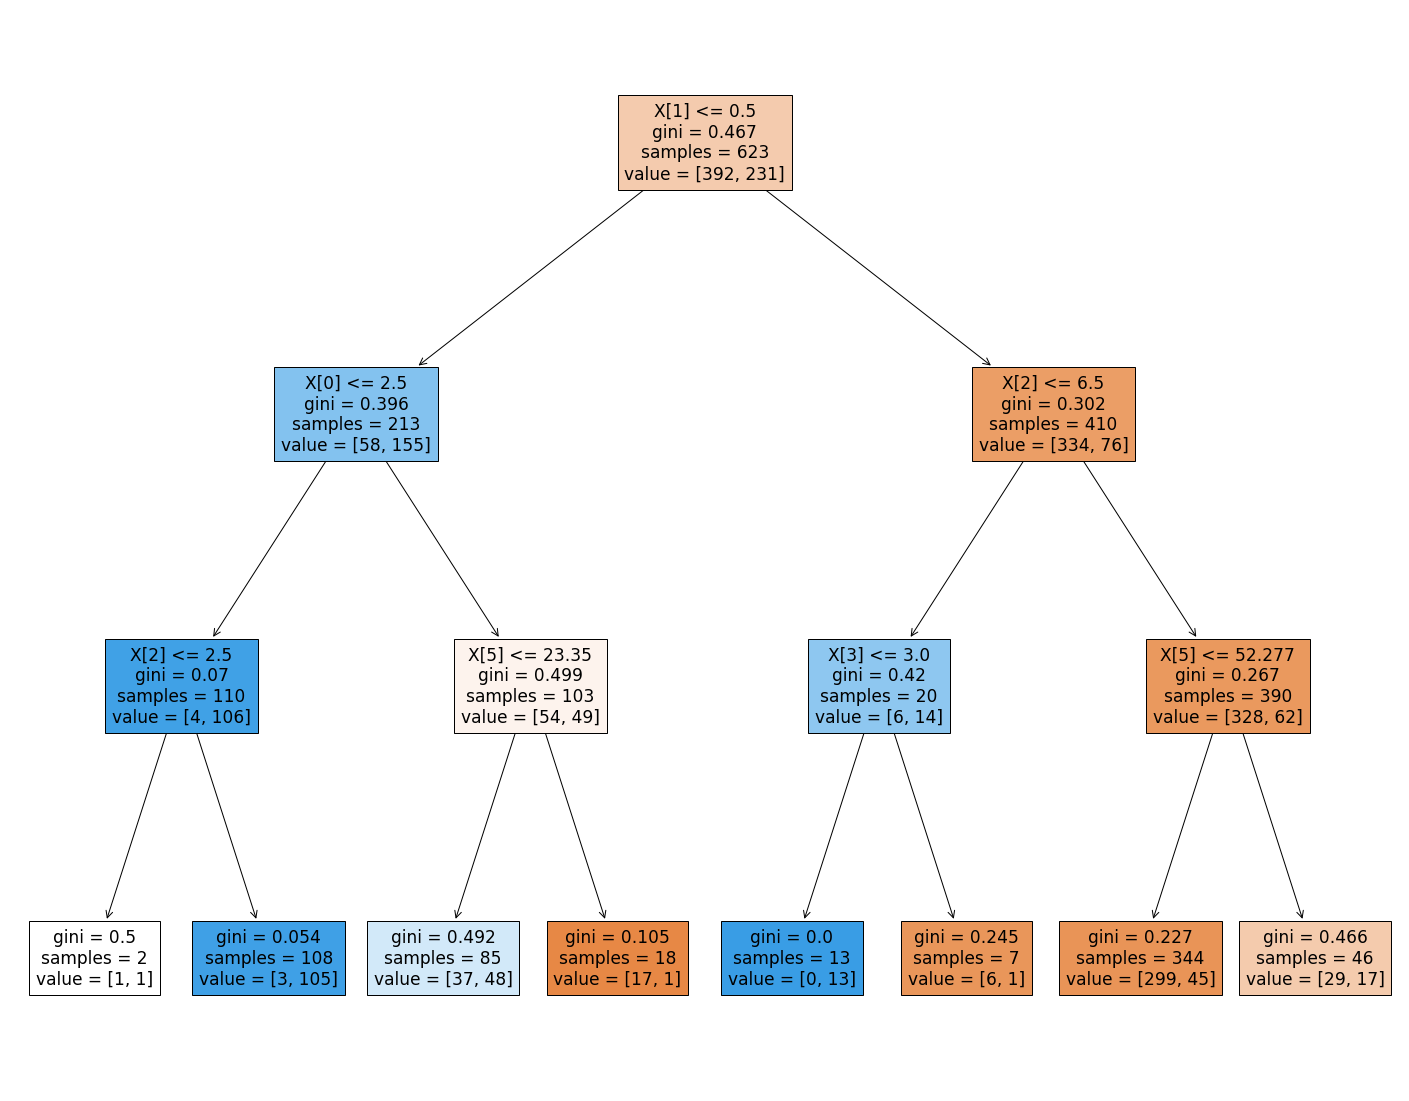

In [92]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_improved, 
                   
                   filled=True)
